In [1]:
import h5py
import numpy as np

In [2]:
# Load Raw Data

'''
kspace (2, 288, 640, 16, 83):

* 2: real and imaginary parts of complex data
* 288: Radial measurements (x-direction, number of spokes)
* 640: Radial measurements (y-direction, number of samples per spoke)
* 16: Number of coils
* 83: Partitions along z-axis

temptv (192, 4, 320, 320):

* 192: Number of slices
* 4: Number of time frames
* 320: Height of each image
* 320: Width of each image

'''


# Path to the HDF5 file
file_path = '/gpfs/data/karczmar-lab/workspaces/rachelgordon/demo_dce_recon/fastMRI_breast_001_1/fastMRI_breast_001_1.h5'

# Open the HDF5 file
with h5py.File(file_path, 'r') as f:
    # Load the datasets
    kspace = f['kspace'][:]
    temptv = f['temptv'][:]

# Now kspace and temptv are numpy arrays containing the data
print("kspace shape:", kspace.shape)
print("temptv shape:", temptv.shape)

kspace shape: (2, 288, 640, 16, 83)
temptv shape: (192, 4, 320, 320)


In [22]:
# Undersample According to a Given Factor of Spokes to Mask

# Define undersampling factor (keep every 4th spoke)
undersampling_factor = 2

# Create a mask for undersampling
mask = np.zeros_like(kspace, dtype=np.float32)  # Same shape as kspace_data
mask[:, ::undersampling_factor, :, :, :] = 1  # Keep every undersampling_factor-th spoke

# Apply the mask to the k-space data
undersampled_kspace_data = kspace * mask

# Check the shape remains the same
print("Original shape:", kspace.shape)
print("Undersampled shape:", undersampled_kspace_data.shape)

Original shape: (2, 288, 640, 16, 83)
Undersampled shape: (2, 288, 640, 16, 83)


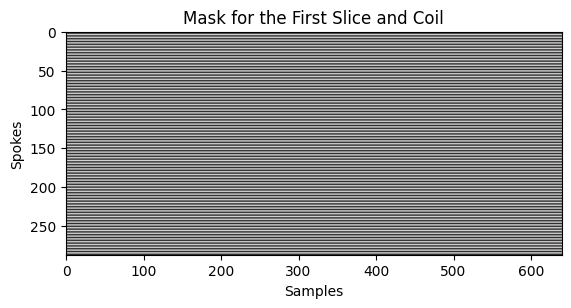

In [23]:
import matplotlib.pyplot as plt 

# Visualize the mask for the first slice and coil
plt.imshow(mask[0, :, :, 0, 0], cmap='gray')
plt.title("Mask for the First Slice and Coil")
plt.xlabel("Samples")
plt.ylabel("Spokes")
plt.show()

Difference between original and undersampled k-space data:  11967.408938248409


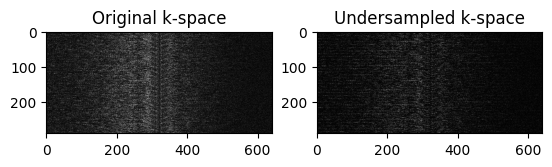

In [25]:
# Check the difference between original and undersampled k-space data
difference = np.abs(kspace - undersampled_kspace_data)
print("Difference between original and undersampled k-space data: ", np.sum(difference))

# Visualize a slice of the k-space data
plt.subplot(1, 2, 1)
plt.imshow(np.abs(kspace[0, :, :, 0, 0]), cmap='gray')
plt.title("Original k-space")

plt.subplot(1, 2, 2)
plt.imshow(np.abs(undersampled_kspace_data[0, :, :, 0, 0]), cmap='gray')
plt.title("Undersampled k-space")
plt.show()

In [26]:
# Check that undersampled tensor is different from original kspace tensor

if undersampled_kspace_data.shape == kspace.shape:
    # Check if content is the same
    equal = np.allclose(undersampled_kspace_data, kspace, atol=1e-8)  # atol is the tolerance for floating point comparisons
else:
    equal = False

print("Are the tensors equal?", equal)

Are the tensors equal? False


In [7]:
# Save to a File

# Path to the output HDF5 file
output_file_path = '/gpfs/data/karczmar-lab/workspaces/rachelgordon/demo_dce_recon/undersampled_kspace_data.h5'

# Create or open the HDF5 file
with h5py.File(output_file_path, 'w') as h5f:
    # Create a dataset for the undersampled k-space data
    h5f.create_dataset('kspace', data=undersampled_kspace_data)

    # Optionally, save the mask or any other relevant information
    # mask = np.zeros_like(undersampled_kspace_data, dtype=np.float32)
    # mask[:, ::4, :, :, :] = 1  # Example mask with an undersampling factor of 4
    # h5f.create_dataset('mask', data=mask)

    # # Save additional metadata if necessary
    # h5f.attrs['description'] = 'Undersampled k-space data with every 4th spoke retained'
    # h5f.attrs['undersampling_factor'] = 4

print(f"Undersampled k-space data saved to {output_file_path}")

Undersampled k-space data saved to /gpfs/data/karczmar-lab/workspaces/rachelgordon/demo_dce_recon/undersampled_kspace_data.h5


In [3]:
# Undersample by masking a random percentage of spokes

# Define the percentage of spokes to keep
percentage_to_keep = 0.1 

# Create a random mask for undersampling
num_spokes = kspace.shape[1]  # Number of spokes
mask = np.zeros((kspace.shape[0], num_spokes, kspace.shape[2], kspace.shape[3], kspace.shape[4]), dtype=np.float32)

# Randomly choose which spokes to keep
num_spokes_to_keep = int(num_spokes * percentage_to_keep)
indices_to_keep = np.random.choice(num_spokes, num_spokes_to_keep, replace=False)

# Set the selected spokes to 1 in the mask
mask[:, indices_to_keep, :, :, :] = 1

# Apply the mask to the k-space data
undersampled_kspace_data = kspace * mask

# Check the shape remains the same
print("Original shape:", kspace.shape)
print("Undersampled shape:", undersampled_kspace_data.shape)

Original shape: (2, 288, 640, 16, 83)
Undersampled shape: (2, 288, 640, 16, 83)


In [4]:
# Check that undersampled tensor is different from original kspace tensor

if undersampled_kspace_data.shape == kspace.shape:
    # Check if content is the same
    equal = np.allclose(undersampled_kspace_data, kspace, atol=1e-8)  # atol is the tolerance for floating point comparisons
else:
    equal = False

print("Are the tensors equal?", equal)

Are the tensors equal? False


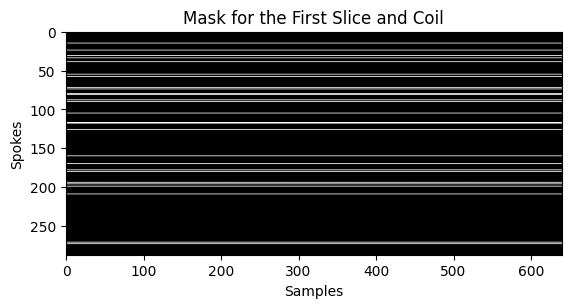

In [5]:
import matplotlib.pyplot as plt 

# Visualize the mask for the first slice and coil
plt.imshow(mask[0, :, :, 0, 0], cmap='gray')
plt.title("Mask for the First Slice and Coil")
plt.xlabel("Samples")
plt.ylabel("Spokes")
plt.show()

Difference between original and undersampled k-space data:  21722.893456062768


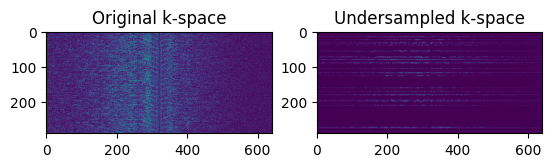

In [10]:
# Check the difference between original and undersampled k-space data
difference = np.abs(kspace - undersampled_kspace_data)
print("Difference between original and undersampled k-space data: ", np.sum(difference))

# Visualize a slice of the k-space data
plt.subplot(1, 2, 1)
plt.imshow(np.abs(kspace[0, :, :, 0, 0]), cmap='viridis')
plt.title("Original k-space")

plt.subplot(1, 2, 2)
plt.imshow(np.abs(undersampled_kspace_data[0, :, :, 0, 0]), cmap='viridis')
plt.title("Undersampled k-space")
plt.show()

kspace shape: (2, 288, 640, 16, 83)
Difference between original and undersampled k-space data:  21599.613091626437


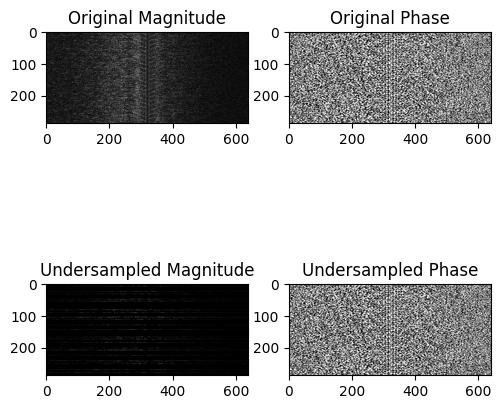

In [5]:
# Load Undersampled data

# Path to the HDF5 file
file_path = '/gpfs/data/karczmar-lab/workspaces/rachelgordon/demo_dce_recon/fastMRI_breast_001_1/fastMRI_breast_001_1_undersampled.h5'

# Open the HDF5 file
with h5py.File(file_path, 'r') as f:
    # Load the datasets
    undersampled_kspace_data = f['kspace'][:]
    #temptv = f['temptv'][:]

# Now kspace and temptv are numpy arrays containing the data
print("kspace shape:", kspace.shape)
#print("temptv shape:", temptv.shape)

import numpy as np
import matplotlib.pyplot as plt

# Compute the magnitude and phase
magnitude_original = np.abs(kspace[0, :, :, 0, 0])
phase_original = np.angle(kspace[0, :, :, 0, 0])

magnitude_undersampled = np.abs(undersampled_kspace_data[0, :, :, 0, 0])
phase_undersampled = np.angle(undersampled_kspace_data[0, :, :, 0, 0])

# Check the difference between original and undersampled k-space data
difference = np.abs(kspace - undersampled_kspace_data)
print("Difference between original and undersampled k-space data: ", np.sum(difference))

# Plot the magnitude and phase of the original and undersampled k-space data
plt.figure(figsize=(12, 6))

# Original k-space
plt.subplot(2, 4, 1)
plt.imshow(magnitude_original, cmap='gray')
plt.title("Original Magnitude")

plt.subplot(2, 4, 2)
plt.imshow(phase_original, cmap='gray')
plt.title("Original Phase")

# Undersampled k-space
plt.subplot(2, 4, 5)
plt.imshow(magnitude_undersampled, cmap='gray')
plt.title("Undersampled Magnitude")

plt.subplot(2, 4, 6)
plt.imshow(phase_undersampled, cmap='gray')
plt.title("Undersampled Phase")

plt.show()

In [8]:
# Save to a File

# Path to the output HDF5 file
output_file_path = '/gpfs/data/karczmar-lab/workspaces/rachelgordon/demo_dce_recon/undersampled_kspace_data.h5'

# Create or open the HDF5 file
with h5py.File(output_file_path, 'w') as h5f:
    # Create a dataset for the undersampled k-space data
    h5f.create_dataset('kspace', data=undersampled_kspace_data)

    # Optionally, save the mask or any other relevant information
    # mask = np.zeros_like(undersampled_kspace_data, dtype=np.float32)
    # mask[:, ::4, :, :, :] = 1  # Example mask with an undersampling factor of 4
    # h5f.create_dataset('mask', data=mask)

    # # Save additional metadata if necessary
    # h5f.attrs['description'] = 'Undersampled k-space data with every 4th spoke retained'
    # h5f.attrs['undersampling_factor'] = 4

print(f"Undersampled k-space data saved to {output_file_path}")

Undersampled k-space data saved to /gpfs/data/karczmar-lab/workspaces/rachelgordon/demo_dce_recon/undersampled_kspace_data.h5


In [8]:
# Path to the HDF5 file
file_path = '/gpfs/data/karczmar-lab/workspaces/rachelgordon/demo_dce_recon/undersampled_kspace_data/undersampled_kspace_data.h5'

# Open the HDF5 file
with h5py.File(file_path, 'r') as f:
    # Load the datasets
    kspace = f['kspace'][:]
    #temptv = f['temptv'][:]

# Now kspace and temptv are numpy arrays containing the data
print("kspace shape:", kspace.shape)
#print("temptv shape:", temptv.shape)

kspace shape: (2, 288, 640, 16, 83)


In [16]:
print(kspace[0][1][300][10][0])

-0.0
